# Project 2:  Lucid Titanic Sleuthing

## Part 1: Developing an understanding of the data

#### Based on the description of the data you read in the readme describe in your own words this data.

The data in the CSV file contains a subset of the passenger manifest for the vessel RMS Titanic. This data contains details regarding the accomodation class, whether the passenger survived or not, passenger name, gender, age, general family details (siblings/parents on board), the purchased ticket number and fare paid, original port of embarkation, lifeboat number, body number (if deceased), and what appears to be the passengers' final destination. This data is not complete, as it was expected that records keeping was not the highest of priorities during the sinking of the RMS Titanic. Data will have to be imputed based on other passenger attributes including (but not limited to) name, age, general family details, and class of fare/ticket number. Taking the imputed data into consideration, we should then be able to create a model that should be able to predict whether other passengers (not identified on this manifest)  survived or not based on the passenger details.

#### Based on our conceptual understanding of the columns in this data set.  What are the reasonable range of the values for the Sex, Age, SibSp, Parch columns.

### Open the data in sublime text is there anything that jumps out to you?

Passengers in 3rd class appear to have less details available and also appear at first glance to have a higher casualty rate compared to 1st and 2nd class.

## Part 2: reading the data in

#### Now read the data into a Pandas DataFrame

In [314]:
%matplotlib inline
import pandas as pd
import numpy as np

# Import file into pandas dataframe
rmst = pd.read_csv('./assets/titanic.csv')

#### Check that the age column doesn't have any unreasonable values 

In [315]:
# A pandas description method of the age column will reveal information
# relevant to this section. Though the quartiles may not be computable 
# due to the NaN's still existing at this point of the process, we can 
# see whether the values are in a reasonable range (ie: not more than 
# an unreasonable age nor a negative or zero value) and whether there 
# are any data types that are not appropriate for this column. Should 
# there be an inappropriate data type in this column, the dtype would 
# be expected to be returned as an object.

rmst['age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%              NaN
50%              NaN
75%              NaN
max        80.000000
Name: age, dtype: float64

#### Check for missing values.  How do you know that a value is missing?

Missing values are represented as a 'NaN' in the data. 

#### Does it makes sense to guess at the value?

Data imputation makes sense in the way that guessing missing values (based on statistical measurements performed on existing data) can help provide a more complete data set capable of providing more accurate estimates. 

## Part 3: data imputation

#### Well let’s say that it does... You likely noticed that Age has some missing values. How many are missing?

In [321]:
# Count missing values by counting the number of null values in 
# the age column
print "There are " + str(rmst['age'].isnull().sum()) + " missing values for age in the Titanic dataset."

There are 263 missing values for age in the Titanic dataset.


#### For the Age of the passengers ... how would you guess at the missing values using the other data present in the CSV.

I would factor in the following to guess at the missing age values:

1. Title (ie: Presence of "Master" in name indicates an infant or age of less than 1)
2. Average age vs. gender and value of fare paid
3. Average age vs. gender and Port of Embarkation
4. If sibsp and parch values are non-zero, check if missing age is of spouse or child
   This would be done via checking if associated children exist, if not then the average
   age of the spouse according to gender
   If there is a missing value for a family but both parents are accounted for, then 
   check the average age of children matching the gender (unless condition #1 exists,
   in which case the average of all infants would be used)

## Part 4: Group Statistics

#### Are there any groups that were especially adversely affected in the Titanic wreck? (justify your response numerically)

In [317]:
# Pivot Tables will be used to categorize and reorganize the data 
# in a way that is relevant to the values I am looking for in 
# determining responses.

# Create a pivot table for all ticketed passengers, organize 
# according to passenger class, sex, and port of embarkation and 
# categorize by whether the passenger survived or not. Add totals 
# across both axis by use of the margins flag in the pandas 
# pivot_table method. 
rmst_gctable = rmst.pivot_table('ticket', index=['pclass','sex','embarked'],columns='survived',aggfunc=len,margins=True)

# Create a column to calculate the survival rate for each row
rmst_gctable['survivalrate']=rmst_gctable[1]/(rmst_gctable['All'])

# Rename columns for ease of reading/understanding tables and graphs
rmst_gctable.columns=['Deceased','Survived','All','SurvivalRate']

# Print the pivot table
rmst_gctable

Deceased  Survived     All  SurvivalRate
pclass sex    embarked                                          
1      female C              2.0      69.0    71.0      0.971831
              Q              NaN       2.0     2.0      1.000000
              S              3.0      66.0    69.0      0.956522
       male   C             42.0      28.0    70.0      0.400000
              Q              1.0       NaN     1.0           NaN
              S             75.0      33.0   108.0      0.305556
2      female C              NaN      11.0    11.0      1.000000
              Q              NaN       2.0     2.0      1.000000
              S             12.0      81.0    93.0      0.870968
       male   C             12.0       5.0    17.0      0.294118
              Q              5.0       NaN     5.0           NaN
              S            129.0      20.0   149.0      0.134228
3      female C              9.0      22.0    31.0      0.709677
              Q             23.0      33.0    56.0      0.589286
              S             78.0      51.0   129.0      0.395349
       male   C             55.0      15.0    70.0      0.214286
              Q             50.0       7.0    57.0      0.122807
              S            313.0      53.0   366.0      0.144809
All                        809.0     498.0  1307.0      0.381025

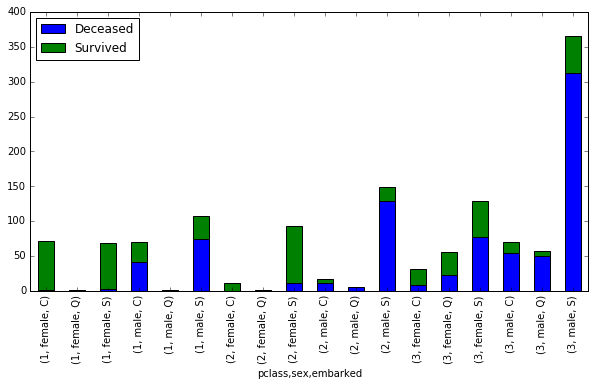

In [318]:
# Plot the data excluding the summary totals according to row 
# and column as generated by use of the margins flag when 
# creating the pivot table.

rmst_gctable.iloc[:-1,:2].plot(kind='bar',figsize=(10,5),stacked=True)

Based on the information above, it appears men were generally less likely to have survived the wreck. Within the male passenger population, chances of survival were higher for class 1 passengers. 

#### Are there any groups that outperformed the survival of the latter group? (justify your response numerically)


Passengers that embarked from Port of Embarkation C (Cherbourg) seem to have had a slightly higher chance of survival compared to passengers who embarked from the other two possible Ports of Embarkation within each respective passenger class. 

This significance of the survival rate based on Port of Embarkation may decrease according to passenger class as the distribution of the population within the passenger class becomes skewed towards passengers having embarked from Port of Embarkation S (Southhampton).

## Part 5:  Comparative Statistics:  Lusitania

#### Are there any groups that were especially adversely affected in the Lusitania wreck? (justify your response numerically)

Based on the figures below, there does not appear to be any particular group that was especially likely to have been adversely affected though the Male Engineering Crew and Male Third Class passengers seem to have been slightly more adversely affected than other groups in this wreck. The average difference between the survival rates of each specific class and gender is within approximately 1-2% of the overall average survival rate across all passengers. In the case of the Male Engineering Crew and Male Third Class passengers, this difference exceeds 3%.

In [308]:
# Import file into pandas dataframe
rmsl = pd.read_csv('./assets/lusitania.csv')

# Create a pivot table for all passengers with value, organize 
# according to sex, passenger/crew status, and passenger class 
# or crew designation and categorize by fate. Add totals across 
# both axis by use of the margins flag in the pandas pivot_table 
# method. 
rmsl_gctable = rmsl.pivot_table('Value', index=['Sex','Passenger/Crew','Department/Class'],columns='Fate',aggfunc=len,margins=True)

# Create a column to calculate the survival rate for each row
rmsl_gctable['Survival Rate']=rmsl_gctable['Saved']/(rmsl_gctable['All'])

# Print the pivot table
rmsl_gctable

Fate                                                       Lost  Not on board  \
Sex    Passenger/Crew Department/Class                                          
Female Crew           Victualling                          16.0           NaN   
       Passenger      Saloon                               56.0           1.0   
                      Second                              185.0           NaN   
                      Third                                68.0           NaN   
Male   Crew           Band                                  2.0           NaN   
                      Deck                                 32.0           NaN   
                      Engineering                         201.0           NaN   
                      Victualling                         151.0           NaN   
       Passenger      Saloon                              121.0           NaN   
                      Second                              187.0           NaN   
                      Third                               168.0           NaN   
                      Third (Distressed British Seaman)     3.0           NaN   
       Stowaway       Stowaway                              3.0           NaN   
All                                                      1193.0           1.0   

Fate                                                     Saved  \
Sex    Passenger/Crew Department/Class                           
Female Crew           Victualling                          9.0   
       Passenger      Saloon                              34.0   
                      Second                             108.0   
                      Third                               40.0   
Male   Crew           Band                                 3.0   
                      Deck                                37.0   
                      Engineering                        112.0   
                      Victualling                        129.0   
       Passenger      Saloon                              78.0   
                      Second                             119.0   
                      Third                               94.0   
                      Third (Distressed British Seaman)    NaN   
       Stowaway       Stowaway                             NaN   
All                                                      763.0   

Fate                                                     Saved (died from trauma)  \
Sex    Passenger/Crew Department/Class                                              
Female Crew           Victualling                                             NaN   
       Passenger      Saloon                                                  NaN   
                      Second                                                  1.0   
                      Third                                                   NaN   
Male   Crew           Band                                                    NaN   
                      Deck                                                    NaN   
                      Engineering                                             NaN   
                      Victualling                                             1.0   
       Passenger      Saloon                                                  1.0   
                      Second                                                  1.0   
                      Third                                                   NaN   
                      Third (Distressed British Seaman)                       NaN   
       Stowaway       Stowaway                                                NaN   
All                                                                           4.0   

Fate                                                        All  Survival Rate  
Sex    Passenger/Crew Department/Class                                          
Female Crew           Victualling                          25.0       0.360000  
       Passenger      Saloon              

In [322]:
# Inspecting a more general dataset to see if there are any general 
# observable patterns
rmsl_gtable = rmsl.pivot_table('Value', index=['Sex'],columns='Fate',aggfunc=len,margins=True)

# Create a column to calculate the survival rate for each row
rmsl_gtable['Survival Rate']=rmsl_gtable['Saved']/(rmsl_gtable['All'])

# Print the pivot table
rmsl_gtable

Fate,Lost,Not on board,Saved,Saved (died from trauma),All,Survival Rate
Sex,,,,,,
Female,325.0,1.0,191.0,1.0,518.0,0.368726
Male,868.0,NaN,572.0,3.0,1443.0,0.396396
All,1193.0,1.0,763.0,4.0,1961.0,0.389087


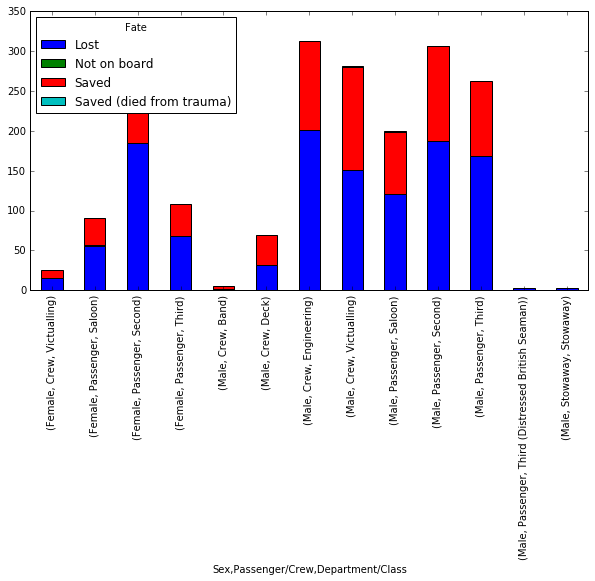

In [298]:
# Plot the data excluding the summary totals according to row and 
# column as generated by use of the margins flag when creating 
# the pivot table.
rmsl_gctable.iloc[:-1,:4].plot(kind='bar',figsize=(10,5),stacked=True)

#### Are there any groups that outperformed the survival of the latter group? (justify your response numerically)



For the wreck of the Lusitania, there appears to have been an advantage of being a male on deck or serving in the Victualing department with those two groups having survived at a combined average of 0.4976535 (49.76%) against the overall survivial average of 0.389087 (38.91%). In comparison, the overall average rate of survivial for females was  0.367835 (36.7835%).

#### What does the group-wise survival rate imply about circumstances during these two accidents?

One inference that may be possible from the data is that conditions during the wreck of the Lusitania may have been either accelerated or other situational variables present that prevented the evacuation of passengers according to the "women and children to safety first" model of disaster response. It may be possible that the wreck of the RMS Lusitania helped affirm the notion of the "women and children to safety first" model as this wreck occured roughly four years prior to the Titanic. However, one variable that also needs to be considered is both the violent nature of the wreck of the Lusitania (which may contribute to explaining the casualty rate of engineering and third class passengers) along with the approximate time it took for the Lusitania to sink (18 minutes, compared to the roughly 1.5 hours it took for the RMS Titanic to finally sink). 